# Partie A : Analyse POS et TF-IDF

**Université Paris Cité - Master 2 VMI**

## Objectif
Ce notebook effectue une analyse approfondie du corpus prétraité :
- **Part-of-Speech (POS) Tagging** : Distribution des catégories grammaticales
- **TF-IDF Vectorization** : Représentation vectorielle du corpus

## Données d'entrée
`data_preprocessed.csv` (généré par `PartieA_Preprocessing.ipynb`)

## 1. Setup et Chargement des Données

In [1]:
# =============================================================================
# 1. IMPORTATION DES BIBLIOTHÈQUES
# =============================================================================
# Importation des outils nécessaires :
# - pandas, numpy : manipulation de données et calculs.
# - spacy : traitement du langage naturel (NLP), notamment pour le POS tagging.
# - matplotlib, seaborn : visualisation des données.
# - sklearn (scikit-learn) : pour la vectorisation TF-IDF.
# - scipy, pickle, json : pour la sauvegarde des modèles et matrices.
# Imports
import pandas as pd
import numpy as np
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import save_npz
import pickle
import json

# Configuration
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Chargement du modèle spaCy
nlp = spacy.load('en_core_web_sm')

print("✅ Environnement configuré")

✅ Environnement configuré


In [2]:
# =============================================================================
# 2. CHARGEMENT DES DONNÉES
# =============================================================================
# Chargement du corpus prétraité depuis le fichier CSV.
# Nous utiliserons principalement la colonne 'text' pour le POS tagging
# et la colonne 'lemmatized_text' pour la vectorisation TF-IDF.
# Chargement du dataset prétraité
df = pd.read_csv('data_preprocessed.csv')

print(f"📊 Dataset chargé : {len(df)} phrases")
print(f"Colonnes : {list(df.columns)}")
df.head()

📊 Dataset chargé : 700 phrases
Colonnes : ['id', 'words', 'ner_tags', 'text', 'cleaned_text', 'lemmatized_text']


,id,words,ner_tags,text,cleaned_text,lemmatized_text
0,en-doc5809-sent11,['When' 'Aeneas' 'later' 'traveled' 'to' 'Hade...,[0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0],"When Aeneas later traveled to Hades , he calle...",when aeneas later traveled to hades he called ...,when aeneas later travel to hade he call to he...
1,en-doc6123-sent45,['On' '23' 'November' '1969' 'he' 'wrote' 'to'...,[0 0 0 0 0 0 0 4 4 0 0 0 0 0 0 0 0 0 1 0 0 0 0...,On 23 November 1969 he wrote to The Times news...,on 23 november 1969 he wrote to the times news...,on 23 november 1969 he write to the times news...
2,en-doc5831-sent40,"['Stephenson' ""'s"" 'estimates' 'and' 'organisi...",[2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 0...,Stephenson 's estimates and organising ability...,stephenson s estimates and organising ability ...,stephenson s estimate and organise ability pro...
3,en-doc6189-sent73,['France' 'then' 'postponed' 'a' 'visit' 'by' ...,[1 0 0 0 0 0 2 0],France then postponed a visit by Sharon .,france then postponed a visit by sharon,france then postpone a visit by sharon
4,en-doc6139-sent18,['Only' 'twenty-seven' 'years' 'old' 'at' 'his...,[0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,"Only twenty-seven years old at his death , Mos...",only twenty seven years old at his death mosel...,only twenty seven year old at his death mosele...


## 2. Analyse POS (Part-of-Speech)

In [3]:
# =============================================================================
# 3. EXTRACTION DES POS TAGS (Part-of-Speech)
# =============================================================================
# Fonction pour identifier la catégorie grammaticale de chaque mot (nom, verbe, adjectif...).
# Nous utilisons le modèle 'en_core_web_sm' de spaCy pour cette tâche.
# Les tags sont ensuite stockés dans une nouvelle colonne 'pos_tags'.
# Fonction pour extraire les POS tags
def extract_pos_tags(text):
    """Extrait les POS tags d'un texte avec spaCy."""
    if not isinstance(text, str) or not text.strip():
        return []
    doc = nlp(text)
    return [token.pos_ for token in doc]

print("🔄 Extraction des POS tags en cours...")
df['pos_tags'] = df['text'].apply(extract_pos_tags)

# Comptage global des POS tags
all_pos_tags = []
for tags in df['pos_tags']:
    all_pos_tags.extend(tags)

pos_counter = Counter(all_pos_tags)

print(f"\n✅ {len(all_pos_tags)} tokens analysés")
print(f"\nDistribution des POS tags (top 10) :")
for pos, count in pos_counter.most_common(10):
    percentage = (count / len(all_pos_tags)) * 100
    print(f"  {pos:8s} : {count:6d} ({percentage:5.2f}%)")

🔄 Extraction des POS tags en cours...

✅ 17151 tokens analysés

Distribution des POS tags (top 10) :
  NOUN     :   2966 (17.29%)
  PROPN    :   2262 (13.19%)
  ADP      :   2110 (12.30%)
  PUNCT    :   2045 (11.92%)
  DET      :   1565 ( 9.12%)
  VERB     :   1555 ( 9.07%)
  ADJ      :   1181 ( 6.89%)
  AUX      :    663 ( 3.87%)
  PRON     :    637 ( 3.71%)
  CCONJ    :    536 ( 3.13%)


/var/folders/6m/qbwtypmn6ddc3c8qxtp4xydm0000gp/T/ipykernel_63412/632733075.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pos_df, x='Count', y='POS Tag', palette='viridis', ax=ax1)


✅ Graphique sauvegardé : pos_distribution.png


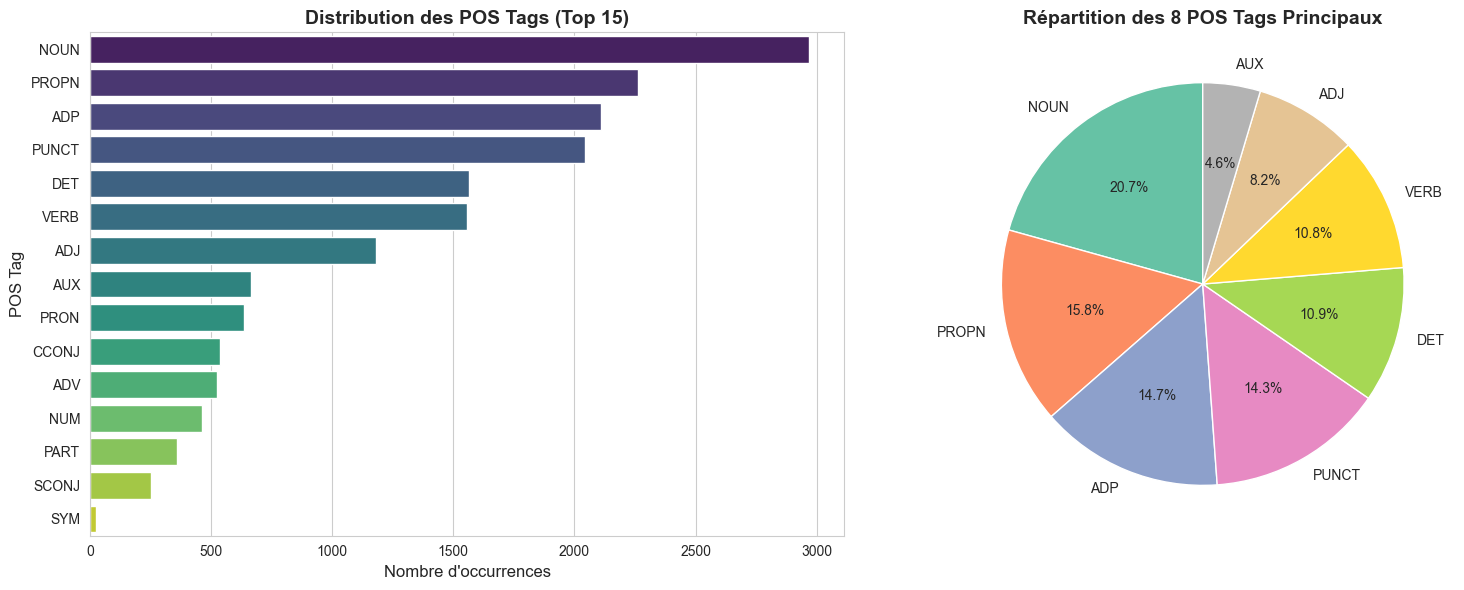

In [4]:
# =============================================================================
# 4. VISUALISATION DE LA DISTRIBUTION POS
# =============================================================================
# Création de graphiques pour visualiser la répartition des catégories grammaticales.
# - Bar chart : montre les 15 tags les plus fréquents en valeur absolue.
# - Pie chart : montre la proportion relative des 8 tags principaux.
# Cela permet de comprendre la structure syntaxique dominante du corpus.
# Visualisation de la distribution POS
pos_df = pd.DataFrame(pos_counter.most_common(15), columns=['POS Tag', 'Count'])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart
sns.barplot(data=pos_df, x='Count', y='POS Tag', palette='viridis', ax=ax1)
ax1.set_title('Distribution des POS Tags (Top 15)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Nombre d\'occurrences', fontsize=12)
ax1.set_ylabel('POS Tag', fontsize=12)

# Pie chart des principaux POS
top_pos = pos_df.head(8)
colors = sns.color_palette('Set2', len(top_pos))
ax2.pie(top_pos['Count'], labels=top_pos['POS Tag'], autopct='%1.1f%%', 
        startangle=90, colors=colors)
ax2.set_title('Répartition des 8 POS Tags Principaux', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('pos_distribution.png', dpi=300, bbox_inches='tight')
print("✅ Graphique sauvegardé : pos_distribution.png")
plt.show()

## 3. Vectorisation TF-IDF

In [5]:
# =============================================================================
# 5. PRÉPARATION POUR TF-IDF
# =============================================================================
# Préparation des données textuelles pour la vectorisation.
# Nous utilisons le texte lemmatisé pour réduire la dimensionnalité et regrouper les termes similaires.
# Les valeurs manquantes (NaN) sont remplacées par des chaînes vides.
# Préparation des textes lemmatisés
texts_lemmatized = df['lemmatized_text'].fillna('').tolist()

print(f"📊 {len(texts_lemmatized)} documents à vectoriser")
print(f"\nExemple de texte lemmatisé :")
print(texts_lemmatized[0][:200] + "...")

📊 700 documents à vectoriser

Exemple de texte lemmatisé :
when aeneas later travel to hade he call to her ghost but she neither speak to nor acknowledge he...


In [6]:
# =============================================================================
# 6. VECTORISATION TF-IDF
# =============================================================================
# Configuration et application de TF-IDF (Term Frequency-Inverse Document Frequency).
# Paramètres clés :
# - max_features=3000 : on ne garde que les 3000 mots les plus pertinents.
# - min_df=2 : on ignore les mots qui apparaissent dans moins de 2 documents (trop rares).
# - max_df=0.8 : on ignore les mots qui apparaissent dans plus de 80% des documents (trop fréquents/stop words).
# - ngram_range=(1, 2) : on considère les mots seuls (unigrammes) et les paires de mots (bigrammes).
# Configuration du vectoriseur TF-IDF
tfidf_vectorizer = TfidfVectorizer(
    max_features=3000,  # Limite à 3000 features (adapté à la taille du corpus)
    min_df=2,           # Ignore les mots apparaissant dans moins de 2 documents
    max_df=0.8,         # Ignore les mots apparaissant dans plus de 80% des documents
    ngram_range=(1, 2), # Unigrammes et bigrammes
    sublinear_tf=True   # Échelle logarithmique pour TF
)

print("🔄 Vectorisation TF-IDF en cours...")
tfidf_matrix = tfidf_vectorizer.fit_transform(texts_lemmatized)

print(f"\n✅ Matrice TF-IDF créée")
print(f"   Forme : {tfidf_matrix.shape}")
print(f"   Densité : {(tfidf_matrix.nnz / (tfidf_matrix.shape[0] * tfidf_matrix.shape[1])) * 100:.2f}%")
print(f"   Vocabulaire : {len(tfidf_vectorizer.vocabulary_)} features")

🔄 Vectorisation TF-IDF en cours...

✅ Matrice TF-IDF créée
   Forme : (700, 2493)
   Densité : 0.77%
   Vocabulaire : 2493 features


In [7]:
# =============================================================================
# 7. ANALYSE DES TERMES IMPORTANTS
# =============================================================================
# Identification des termes ayant les scores TF-IDF moyens les plus élevés.
# Ces termes sont ceux qui sont les plus caractéristiques et discriminants dans le corpus.
# Analyse des top termes TF-IDF
feature_names = tfidf_vectorizer.get_feature_names_out()

# Calcul de la moyenne TF-IDF pour chaque terme
mean_tfidf = np.asarray(tfidf_matrix.mean(axis=0)).flatten()
top_indices = mean_tfidf.argsort()[-20:][::-1]

top_terms = [(feature_names[i], mean_tfidf[i]) for i in top_indices]

print("\n📈 Top 20 termes par TF-IDF moyen :")
for i, (term, score) in enumerate(top_terms, 1):
    print(f"  {i:2d}. {term:30s} : {score:.4f}")


📈 Top 20 termes par TF-IDF moyen :
   1. the                            : 0.0673
   2. be                             : 0.0484
   3. of                             : 0.0482
   4. in                             : 0.0447
   5. and                            : 0.0438
   6. to                             : 0.0391
   7. have                           : 0.0226
   8. as                             : 0.0222
   9. of the                         : 0.0219
  10. for                            : 0.0206
  11. that                           : 0.0200
  12. on                             : 0.0199
  13. in the                         : 0.0199
  14. by                             : 0.0195
  15. he                             : 0.0192
  16. his                            : 0.0191
  17. with                           : 0.0182
  18. it                             : 0.0145
  19. from                           : 0.0141
  20. at                             : 0.0127


/var/folders/6m/qbwtypmn6ddc3c8qxtp4xydm0000gp/T/ipykernel_63412/3748453477.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_terms_df, y='Terme', x='TF-IDF Score', palette='magma')


✅ Graphique sauvegardé : tfidf_top_terms.png


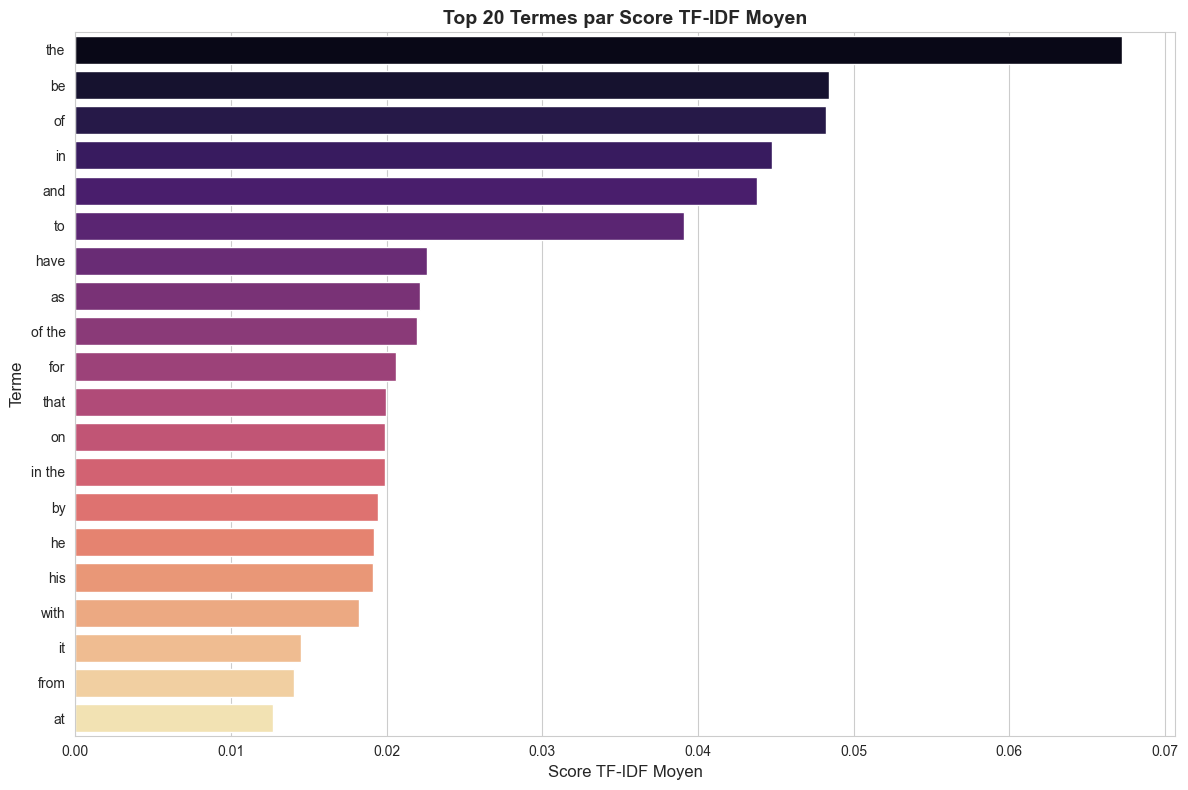

In [8]:
# =============================================================================
# 4. VISUALISATION DE LA DISTRIBUTION POS
# =============================================================================
# Création de graphiques pour visualiser la répartition des catégories grammaticales.
# - Bar chart : montre les 15 tags les plus fréquents en valeur absolue.
# - Pie chart : montre la proportion relative des 8 tags principaux.
# Cela permet de comprendre la structure syntaxique dominante du corpus.
# Visualisation des top termes TF-IDF
top_terms_df = pd.DataFrame(top_terms, columns=['Terme', 'TF-IDF Score'])

plt.figure(figsize=(12, 8))
sns.barplot(data=top_terms_df, y='Terme', x='TF-IDF Score', palette='magma')
plt.title('Top 20 Termes par Score TF-IDF Moyen', fontsize=14, fontweight='bold')
plt.xlabel('Score TF-IDF Moyen', fontsize=12)
plt.ylabel('Terme', fontsize=12)
plt.tight_layout()
plt.savefig('tfidf_top_terms.png', dpi=300, bbox_inches='tight')
print("✅ Graphique sauvegardé : tfidf_top_terms.png")
plt.show()

## 4. Export des Résultats

In [9]:
# =============================================================================
# 8. SAUVEGARDE DES RÉSULTATS
# =============================================================================
# Exportation des artefacts générés pour une réutilisation future (ex: modélisation).
# - tfidf_matrix.npz : la matrice TF-IDF au format sparse (efficace en mémoire).
# - tfidf_vectorizer.pkl : l'objet vectoriseur entraîné (pour transformer de nouveaux textes).
# - tfidf_features.json : la liste des noms des features (mots/n-grams) correspondant aux colonnes.
# Sauvegarde de la matrice TF-IDF
save_npz('tfidf_matrix.npz', tfidf_matrix)
print("✅ Matrice TF-IDF sauvegardée : tfidf_matrix.npz")

# Sauvegarde du vectoriseur
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf_vectorizer, f)
print("✅ Vectoriseur sauvegardé : tfidf_vectorizer.pkl")

# Sauvegarde des noms de features
np.save('tfidf_feature_names.npy', feature_names)
print("✅ Feature names sauvegardés : tfidf_feature_names.npy")

✅ Matrice TF-IDF sauvegardée : tfidf_matrix.npz
✅ Vectoriseur sauvegardé : tfidf_vectorizer.pkl
✅ Feature names sauvegardés : tfidf_feature_names.npy


In [10]:
# Création d'un fichier JSON avec les statistiques
statistics = {
    "corpus": {
        "total_documents": len(df),
        "total_tokens_analyzed": len(all_pos_tags)
    },
    "pos_analysis": {
        "unique_pos_tags": len(pos_counter),
        "top_5_pos": [
            {"tag": tag, "count": count, "percentage": round((count/len(all_pos_tags))*100, 2)}
            for tag, count in pos_counter.most_common(5)
        ]
    },
    "tfidf_analysis": {
        "matrix_shape": list(tfidf_matrix.shape),
        "vocabulary_size": len(tfidf_vectorizer.vocabulary_),
        "sparsity_percentage": round((tfidf_matrix.nnz / (tfidf_matrix.shape[0] * tfidf_matrix.shape[1])) * 100, 2),
        "parameters": {
            "max_features": 3000,
            "min_df": 2,
            "max_df": 0.8,
            "ngram_range": "(1, 2)"
        },
        "top_10_terms": [
            {"term": term, "tfidf_score": round(score, 4)}
            for term, score in top_terms[:10]
        ]
    }
}

with open('pos_tfidf_statistics.json', 'w', encoding='utf-8') as f:
    json.dump(statistics, f, indent=2, ensure_ascii=False)

print("✅ Statistiques sauvegardées : pos_tfidf_statistics.json")

✅ Statistiques sauvegardées : pos_tfidf_statistics.json


## 5. Résumé

### Fichiers générés :
1. **pos_distribution.png** : Graphiques de distribution POS
2. **tfidf_top_terms.png** : Top termes TF-IDF
3. **tfidf_matrix.npz** : Matrice TF-IDF sparse
4. **tfidf_vectorizer.pkl** : Vectoriseur entraîné
5. **tfidf_feature_names.npy** : Noms des features
6. **pos_tfidf_statistics.json** : Statistiques complètes

### Utilisation pour la suite du projet :
- Les POS tags révèlent la structure grammaticale du corpus
- La matrice TF-IDF peut être utilisée pour la classification ou le clustering
- Le vectoriseur permet de transformer de nouveaux documents

In [11]:
print("\n" + "="*60)
print("ANALYSE TERMINÉE ✅")
print("="*60)
print(f"\n📊 {len(df)} documents analysés")
print(f"📝 {len(all_pos_tags)} tokens tagués (POS)")
print(f"🔢 Matrice TF-IDF : {tfidf_matrix.shape[0]} × {tfidf_matrix.shape[1]}")
print(f"💾 6 fichiers exportés")
print("\nTous les résultats sont prêts pour le rapport et les parties suivantes du projet.")


ANALYSE TERMINÉE ✅

📊 700 documents analysés
📝 17151 tokens tagués (POS)
🔢 Matrice TF-IDF : 700 × 2493
💾 6 fichiers exportés

Tous les résultats sont prêts pour le rapport et les parties suivantes du projet.
